#                                          DECISION TREE

Tree like structure
2node- internal nodes(decision nodes)
       leaf nodes
       
To find best attribute- Information gain
                        Gini index

In [3]:
import numpy as np
import matplotlib.pyplot as mtp
import pandas as pd

In [4]:
df=pd.read_csv('iris.csv')

In [5]:
df.species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [6]:
y=df['species']
print(y)
df=df.drop(['species'],axis=1)
x=df
print(x)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object
     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [8]:
from sklearn.preprocessing import MinMaxScaler
st_x=MinMaxScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)
print(x_train)

[[0.44444444 0.41666667 0.53448276 0.58333333]
 [0.41666667 0.25       0.5        0.45833333]
 [0.69444444 0.41666667 0.75862069 0.83333333]
 [0.11111111 0.5        0.03448276 0.04166667]
 [0.72222222 0.45833333 0.68965517 0.91666667]
 [0.19444444 0.625      0.0862069  0.20833333]
 [0.30555556 0.70833333 0.06896552 0.04166667]
 [0.19444444 0.         0.4137931  0.375     ]
 [0.61111111 0.41666667 0.75862069 0.70833333]
 [0.66666667 0.54166667 0.79310345 1.        ]
 [0.47222222 0.08333333 0.67241379 0.58333333]
 [0.66666667 0.20833333 0.81034483 0.70833333]
 [0.36111111 0.20833333 0.48275862 0.41666667]
 [0.94444444 0.41666667 0.86206897 0.91666667]
 [0.55555556 0.54166667 0.62068966 0.625     ]
 [0.33333333 0.16666667 0.46551724 0.41666667]
 [0.55555556 0.29166667 0.65517241 0.70833333]
 [0.55555556 0.33333333 0.68965517 0.58333333]
 [0.16666667 0.20833333 0.5862069  0.66666667]
 [0.55555556 0.20833333 0.67241379 0.75      ]
 [0.75       0.5        0.62068966 0.54166667]
 [0.61111111 

In [9]:
#fitting decision tree classifie to training set
from sklearn import tree
classifier = tree.DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

[Text(267.84000000000003, 391.392, 'X[3] <= 0.292\nentropy = 1.581\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(200.88000000000002, 304.416, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(334.80000000000007, 304.416, 'X[2] <= 0.664\nentropy = 0.994\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(133.92000000000002, 217.44, 'X[3] <= 0.646\nentropy = 0.414\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(66.96000000000001, 130.464, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(200.88000000000002, 130.464, 'X[1] <= 0.458\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(133.92000000000002, 43.488, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.84000000000003, 43.488, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(535.6800000000001, 217.44, 'X[3] <= 0.688\nentropy = 0.172\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(468.72, 130.464, 'X[3] <= 0.646\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(401.76000000000005, 43.488, 'entropy = 0.0\n

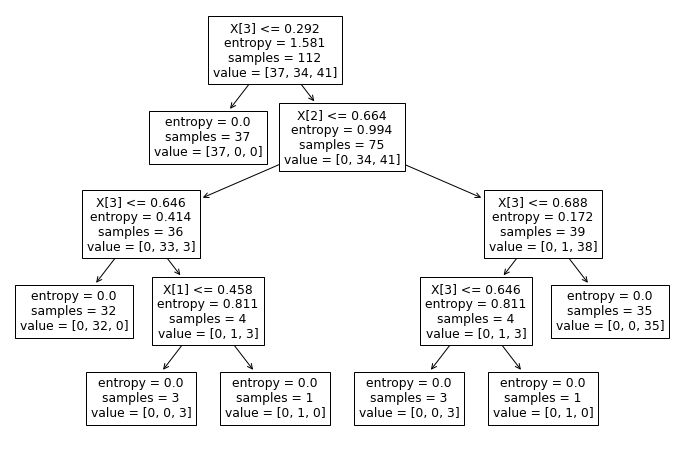

In [10]:
# visualise decision-tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
tree.plot_tree(classifier)

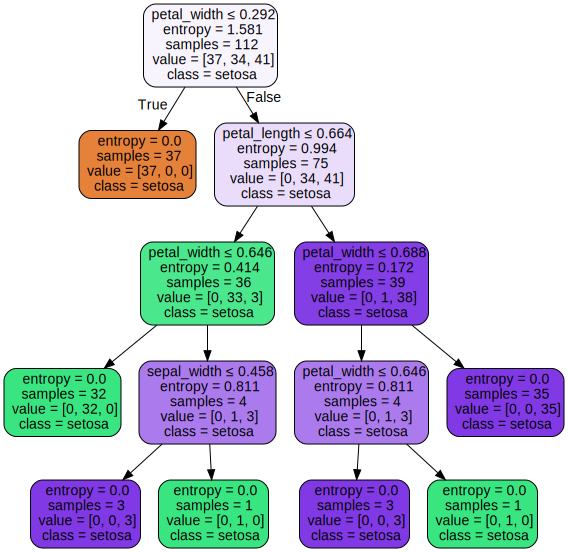

In [11]:
!pip install graphviz
import graphviz
dot_data = tree.export_graphviz(classifier, out_file=None,feature_names=df.columns,class_names=y_train,filled=True, rounded = True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [12]:
y_pred = classifier.predict(x_test)
print(y_pred)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'virginica' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'virginica' 'virginica' 'virginica' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica']


In [13]:
#make confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred,labels=classifier.classes_)
print(cm)

[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]


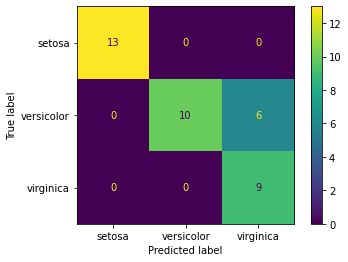

In [14]:
#confusion matrix display
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

In [15]:
#classifier accuracy
training_score=classifier.score(x_train,y_train)
test_score=classifier.score(x_test,y_test)
print(training_score)
print(test_score)

1.0
0.8421052631578947


In [17]:
#check training accuracy
y_pred_train = classifier.predict(x_train)
print("Accuracy score:{0:0.2f}".format(accuracy_score(y_train,y_pred_train)))

NameError: name 'accuracy_score' is not defined